In [57]:
PRFX='DevTrainTestDiff0703'
p_o = f'../output/{PRFX}'

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
from tqdm import tqdm

import pickle

def nfiles(pp):
    return len(list(pp.iterdir()))

def show_sample_images(p):
    fns = np.random.choice(list(p.iterdir()), 5)
    for i, fn in enumerate(fns):
        fig=plt.figure(figsize=(2, 2))
        im = Image.open(fn)
        plt.title(fn)
        plt.imshow(im)

In [59]:
Path(p_o).mkdir(exist_ok=True)

# files

In [60]:
p = '../input/aptos2019-blindness-detection'
pp = Path(p)

In [61]:
nfiles(pp/'train_images'), nfiles(pp/'test_images')

(3662, 1928)

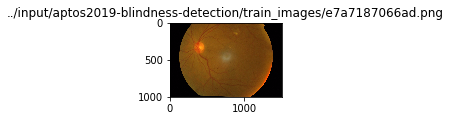

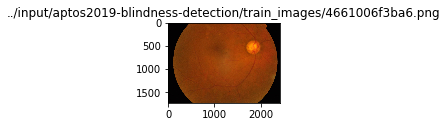

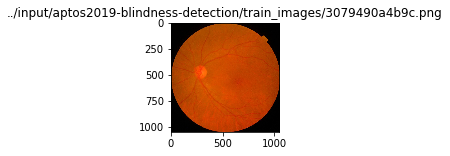

In [62]:
show_sample_images(pp/'train_images')

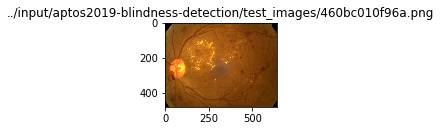

In [63]:
show_sample_images(pp/'test_images')

https://www.kaggle.com/c/aptos2019-blindness-detection/data
You can plan on the private test set consisting of 20GB of data across 13,000 images (approximately).

# get h w stats of images

In [64]:
fnm = list((pp/'train_images').iterdir())[0]

im = Image.open(fnm)

npimg = np.array(im)

h, w, _ = npimg.shape
zero_rate = (npimg ==0).sum()/sz
(h, w, zero_rate, 
 npimg[:,:,0][npimg[:,:,0]>0].mean(),
 npimg[:,:,1][npimg[:,:,1]>0].mean(),
 npimg[:,:,2][npimg[:,:,2]>0].mean())

(1736,
 2416,
 0.003788825266273995,
 109.14488521930033,
 57.49575086834039,
 10.475044308666076)

In [65]:
def get_hws(fnm):
    im = Image.open(fnm)
    npimg = np.array(im)
    h, w, _ = npimg.shape
    return h,w

In [66]:
fnms_train = list((pp/'train_images').iterdir())
hws_trn = [get_hws(fnm) for fnm in tqdm(fnms_train)]

100%|██████████| 3662/3662 [07:11<00:00,  8.48it/s]


In [67]:
fnms_test = list((pp/'test_images').iterdir())
hws_tst = [get_hws(fnm) for fnm in tqdm(fnms_test)]

100%|██████████| 1928/1928 [01:08<00:00, 28.34it/s]


In [68]:
pickle.dump(hws_trn, open(f'{p_o}/hws_trn.p', 'wb'))

pickle.dump(hws_tst, open(f'{p_o}/hws_tst.p', 'wb'))

# analysis

In [27]:
Counter(hws_trn).most_common()

[((1050, 1050), 974),
 ((1736, 2416), 638),
 ((1958, 2588), 533),
 ((2136, 3216), 410),
 ((1536, 2048), 351),
 ((614, 819), 287),
 ((2588, 3388), 141),
 ((1000, 1504), 92),
 ((1226, 1844), 61),
 ((2848, 4288), 52),
 ((480, 640), 42),
 ((1944, 2896), 34),
 ((1424, 2144), 28),
 ((1117, 1476), 14),
 ((1110, 1467), 2),
 ((358, 474), 2),
 ((1764, 2146), 1)]

In [28]:
Counter(hws_tst).most_common()

[((480, 640), 1403),
 ((1736, 2416), 225),
 ((1958, 2588), 134),
 ((1050, 1050), 69),
 ((614, 819), 45),
 ((1536, 2048), 28),
 ((1944, 2896), 11),
 ((1944, 2592), 6),
 ((1117, 1476), 2),
 ((576, 768), 2),
 ((1110, 1467), 2),
 ((1764, 2146), 1)]

In [40]:
[(k,v/len(hws_tst)) for k,v in Counter(hws_tst).most_common()]

[((480, 640), 0.7276970954356846),
 ((1736, 2416), 0.11670124481327801),
 ((1958, 2588), 0.06950207468879668),
 ((1050, 1050), 0.03578838174273859),
 ((614, 819), 0.023340248962655602),
 ((1536, 2048), 0.014522821576763486),
 ((1944, 2896), 0.005705394190871369),
 ((1944, 2592), 0.0031120331950207467),
 ((1117, 1476), 0.001037344398340249),
 ((576, 768), 0.001037344398340249),
 ((1110, 1467), 0.001037344398340249),
 ((1764, 2146), 0.0005186721991701245)]

In [37]:
h,w=zip(*hws_trn)

plt.plot(h,w, '.')

In [38]:
h,w=zip(*hws_tst)

plt.plot(h,w, '.')

# simply crop to most common size won't work; need to remove dark edges and resize by proportion

In [41]:
from fastai.vision import *

In [42]:
crop

TfmPixel (crop)

In [48]:
def get_ex(fnm): return open_image(fnm)

In [54]:
fnm = list((pp/'train_images').iterdir())[0]
img = get_ex(fnm)

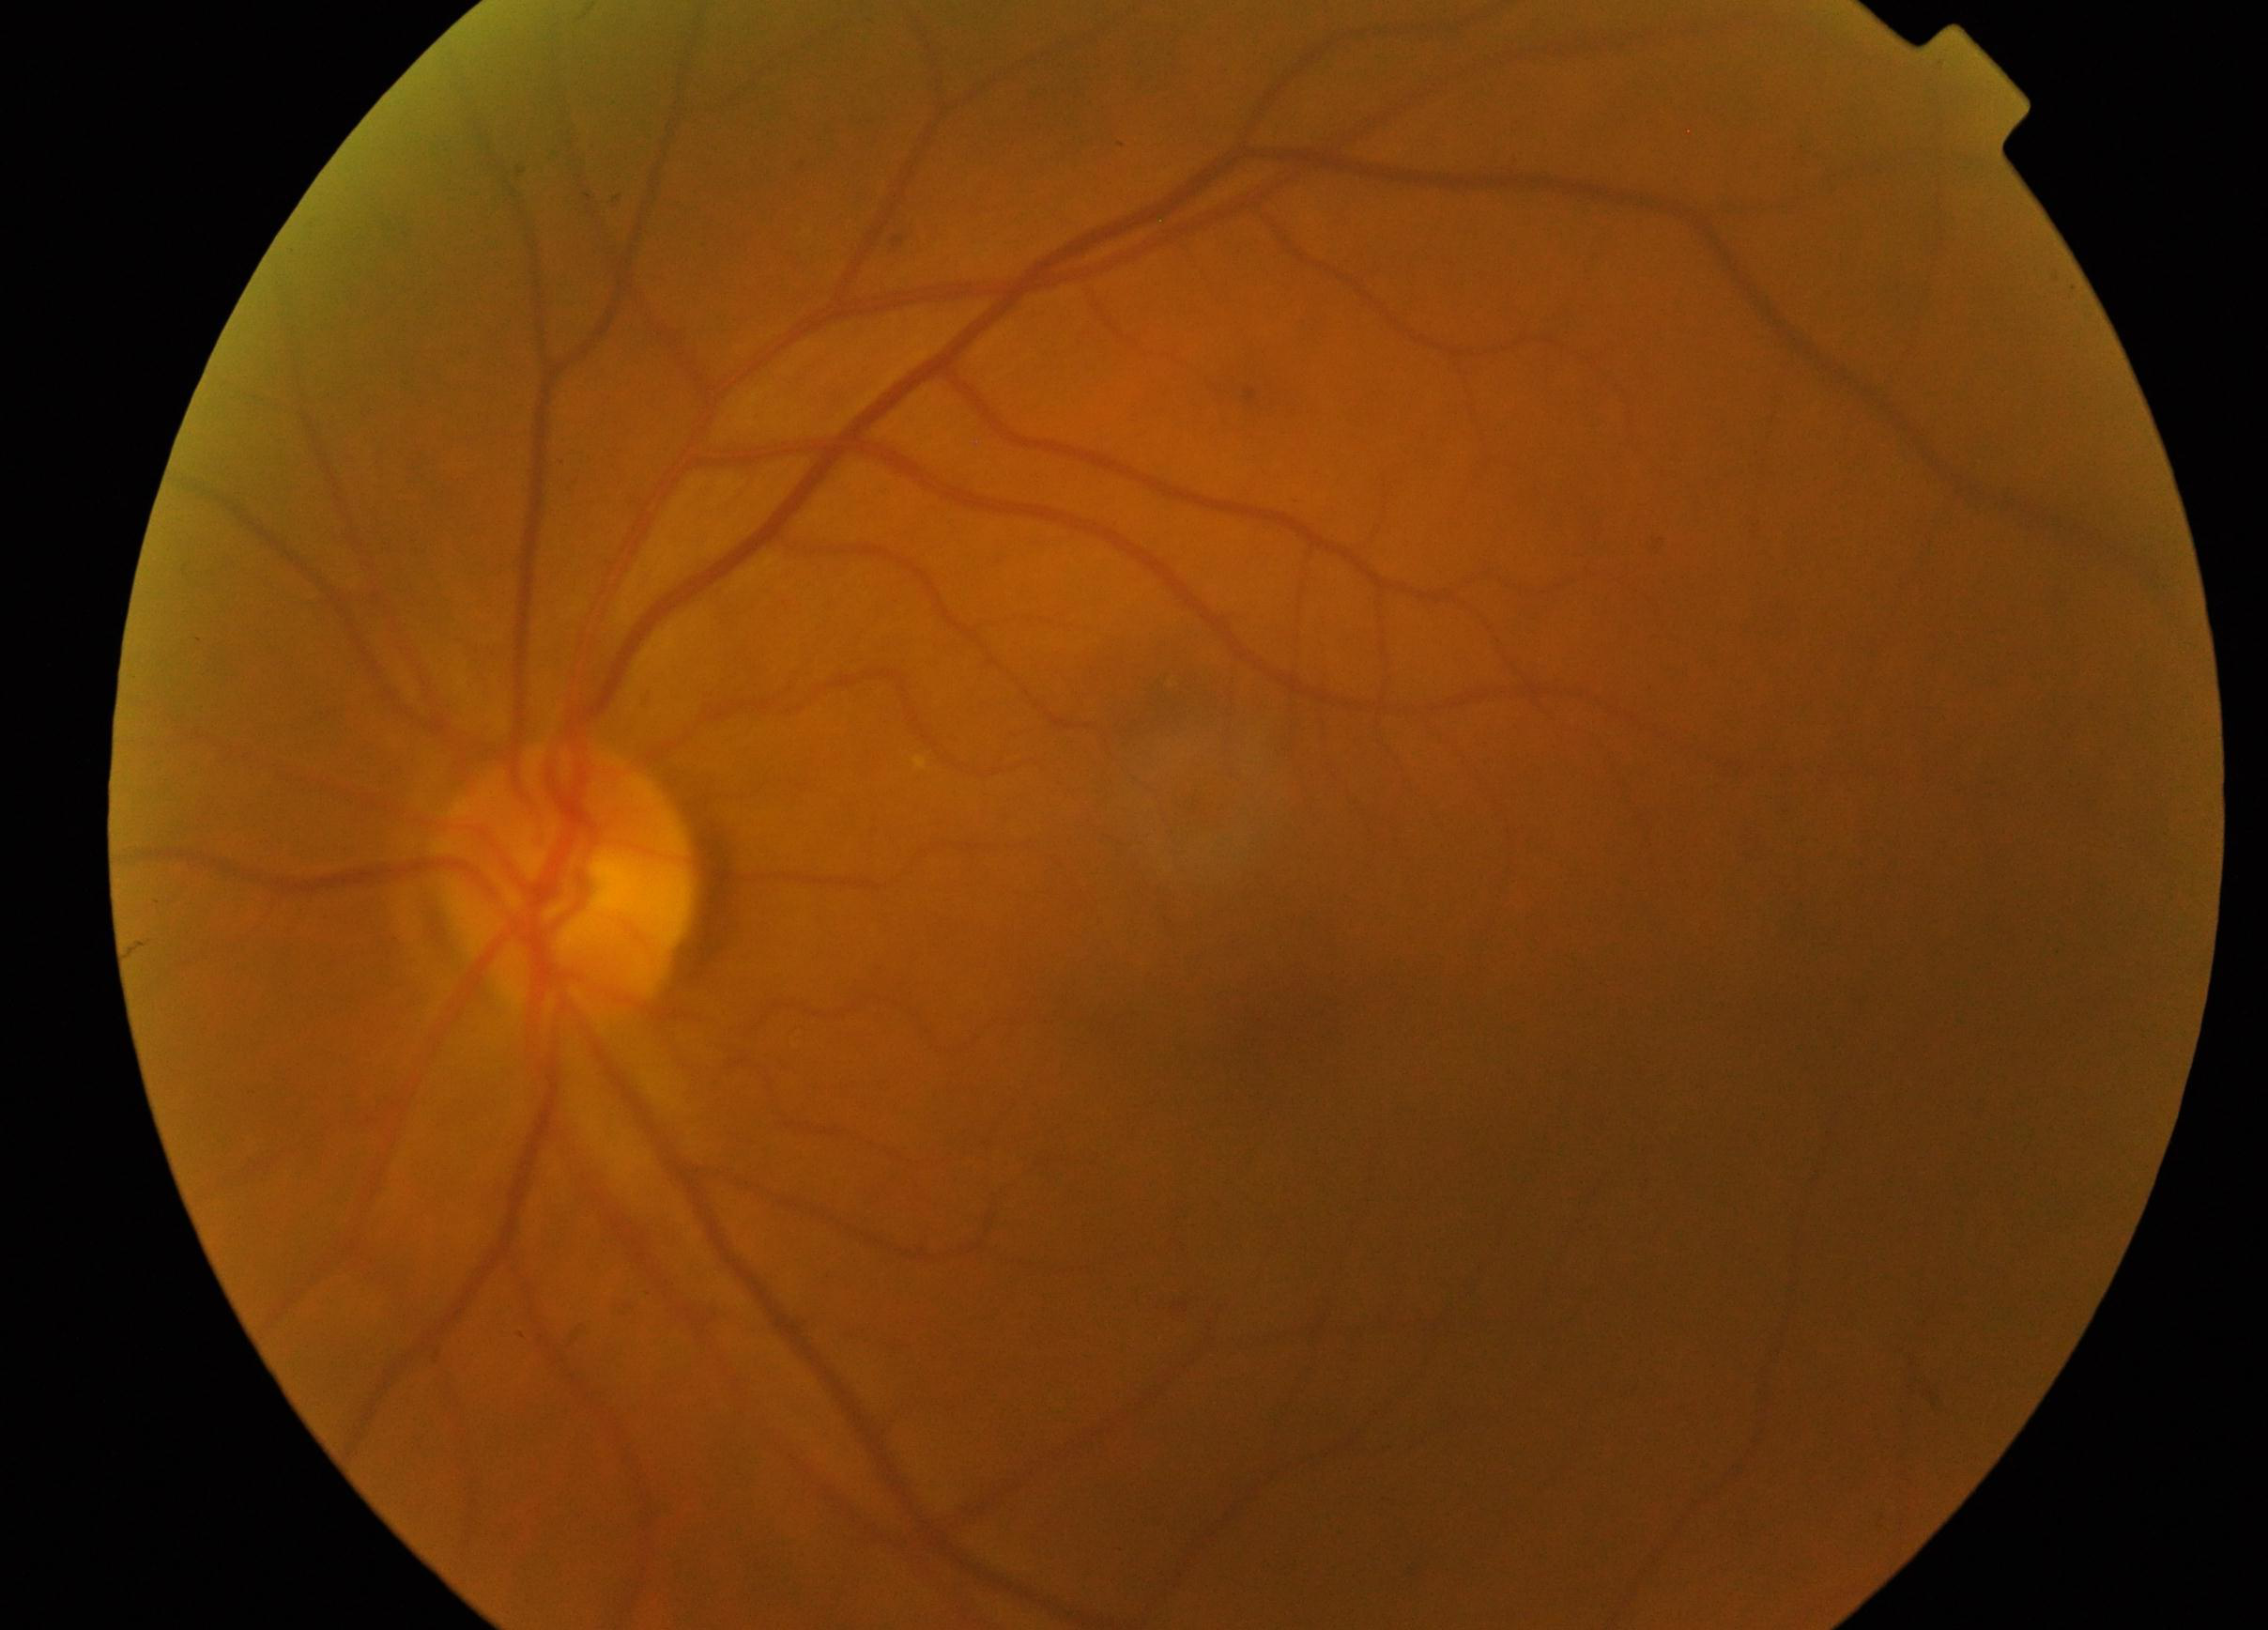

In [55]:
img

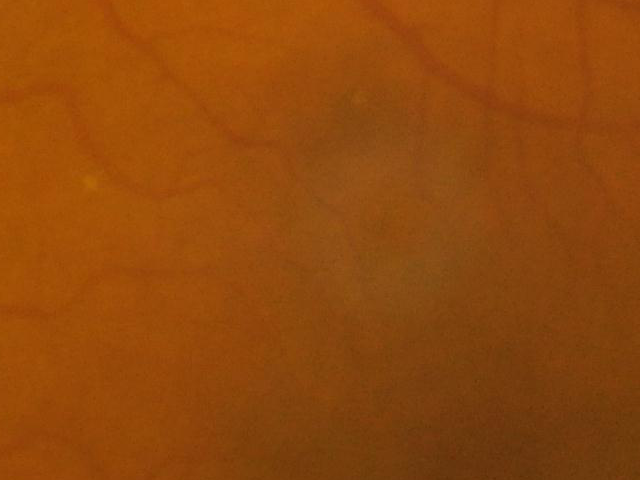

In [56]:
crop(img, (480, 640))